# Simple CNN with Tensorflow

In this notebook, we'll be building a simple Convolution Neural Network (CNN) for the MNIST dataset, a dataset consist of images of written numbers.

In [1]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from numpy.random import seed

In [2]:
# Setting fixed seed for consistent model saving and restoring
seed(7) # keras seed fixing
tf.random.set_seed(7) # tensorflow seed fixing

# Loading Dataset

To load the MNIST dataset on our notebook, we'll use the version tensorflow has within its library. It's stored in the form of two tuples, one for the training set (X_train, y_train) and one for the test set (X_test, y_test).

In [3]:
# Loading MNIST dataset from tensorflow
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Checking dataset size
print('Size of:')
print('- Training-set:\t{}'.format(len(X_train)))
print('- Test-set:\t{}'.format(len(X_test)))

Size of:
- Training-set:	60000
- Test-set:	10000


In [5]:
# Checking dataset shape
print('Shape of:')
print('- Input Data:\t{}'.format(X_train.shape))
print('- Output Data:\t{}'.format(y_train.shape))

Shape of:
- Input Data:	(60000, 28, 28)
- Output Data:	(60000,)


The input data (X_train and X_test) contains sixty and ten thousand (28 x 28) pixel images of numbers, respectively. The output data (y_train and y_test) contains the labels for their corresponding images.

In [6]:
# Shape of the first image array in X_train
X_train[:1].shape

(1, 28, 28)

In [7]:
# Shape of the first image array in X_test
X_test[:1].shape

(1, 28, 28)

# Preprocess MNIST Dataset

The dataset was created in grayscale, so it should be a 3D tensor (one dimension for image height, one for image width, and one for the color channel). However, it would appear that the color channel is missing. We'll reshape our array is reverted back into the correct shape.

In [8]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [9]:
# Shape of the first image array in X_train
X_train[:1].shape

(1, 28, 28, 1)

In [10]:
# Shape of the first image array in X_train
X_test[:1].shape

(1, 28, 28, 1)

In [11]:
# Label of the first image array
y_train[:1]

array([5], dtype=uint8)

In [12]:
# Unique labels
label_list = list(set(y_train))
label_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

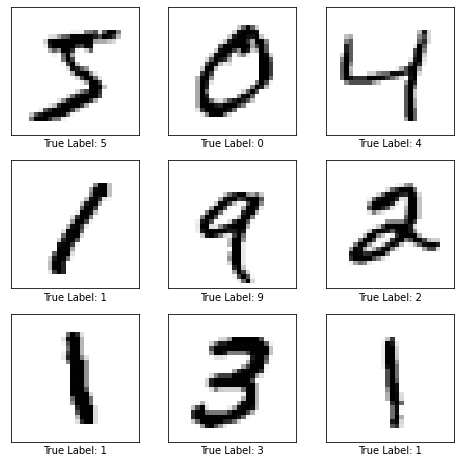

In [13]:
# Checking several image array in grayscale
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='binary')
    plt.xlabel("True Label: {}".format(label_list[y_train[i]]))
plt.show()

To normalize the pixel values of our images such that they'll be between 0 and 1, we'll divide our arrays by 255. This shouldn't affect what our images were.

In [14]:
# Normalizing pixel values between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

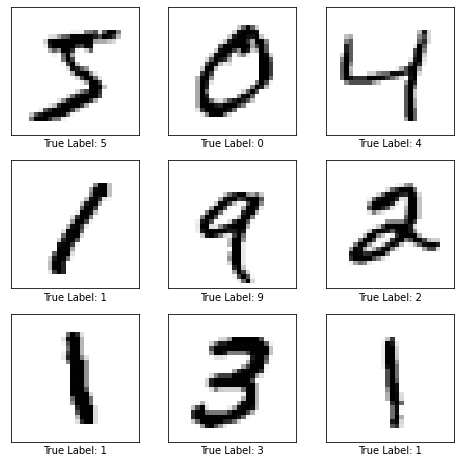

In [15]:
# Checking our images again
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='binary')
    plt.xlabel("True Label: {}".format(label_list[y_train[i]]))
plt.show()

# Setting CNN Framework

Now that we have our dataset and their labels, we lay out the framework for our neural network using Keras from Tensorflow.

In [16]:
# Import Dependencies for Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

General CNN layout:

- Conv2D(16) with 28x28x1 input, 3x3 kernel and ReLU activation
- MaxPooling2D() with 2x2 pool size
- Conv2D(32) with 3x3 kernel and ReLU activation
- MaxPooling2D() with 2x2 pool size
- Conv2D(32) with 3x3 kernel and ReLU activation
- Flatten()
- Dense(32) with ReLU activation
- Dense(10) with softmax activation

In [17]:
# Building our CNN using Sequential
simple_cnn = Sequential()
simple_cnn.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
simple_cnn.add(MaxPooling2D(pool_size=(2,2)))
simple_cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
simple_cnn.add(MaxPooling2D(pool_size=(2,2)))
simple_cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
simple_cnn.add(Flatten())
simple_cnn.add(Dense(32, activation='relu'))
simple_cnn.add(Dense(10, activation="softmax"))

2021-09-24 14:52:36.252117: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-24 14:52:36.252666: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


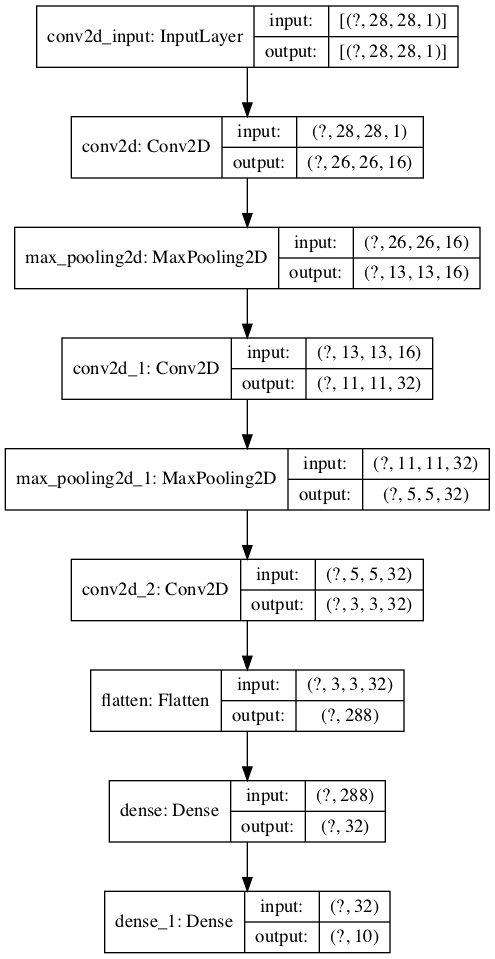

In [18]:
# Checking our CNN model structure
plot_model(simple_cnn, to_file='simple_cnn.png', show_shapes=True)

In [19]:
# Checking our CNN model summary
simple_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                9

In [20]:
# Compiling simple CNN model
simple_cnn.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Model Training

For our simple CNN model, we'll set up a checkpoint directory for checkpoint files to be stored and saved during training. An early stop is also set up to stop model training if model performance during training plateaus.

In [21]:
# Setting checkpoint path to save model weights
curr_dir = os.getcwd()
checkpoint_dir = os.path.join(curr_dir, 'checkpoint')
ckpt_file_path = os.path.join(checkpoint_dir, 'ckpt')

In [22]:
# Setting an early stop to stop training when validation loss plateaus
es = EarlyStopping(monitor='val_loss', patience=5)

# Setting checkpoint settings to save and update best model from training
cp = ModelCheckpoint(filepath=ckpt_file_path, monitor='val_loss',
                     save_best_only=True, mode='min', verbose=1)

In [23]:
# Fitting simple CNN model
history = simple_cnn.fit(X_train, y_train, epochs=100, batch_size=32, 
                         validation_data=(X_test, y_test), callbacks=[es,cp])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
59968/60000 [============================>.] - ETA: 0s - loss: 0.2167 - accuracy: 0.9334
Epoch 00001: val_loss improved from inf to 0.06972, saving model to /Users/Lee/Springboard_Courses/Data_Science_Career_Course/simple_cnn_tensorflow/checkpoint/ckpt
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2021-09-24 14:54:52.101127: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/Lee/Springboard_Courses/Data_Science_Career_Course/simple_cnn_tensorflow/checkpoint/ckpt/assets
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.2167 - accuracy: 0.9334 - val_loss: 0.0697 - val_accuracy: 0.9786
Epoch 2/100
59968/60000 [============================>.] - ETA: 0s - loss: 0.0673 - accuracy: 0.9791
Epoch 00002: val_loss improved from 0.06972 to 0.06361, saving model to /Users/Lee/Springboard_Courses/Data_Science_Career_Course/simple_cnn_tensorflow/checkpoint/ckpt
INFO:tensorflow:Assets written to: /Users/Lee/Springboard_Courses/Data_Science_Career_Course/simple_cnn_tensorflow/checkpoint/ckpt/assets
60000/60000 [==============================] - 134s 2ms/sample - loss: 0.0672 - accuracy: 0.9791 - val_loss: 0.0636 - val_accuracy: 0.9795
Epoch 3/100
59968/60000 [============================>.] - ETA: 0s - loss: 0.0479 - accuracy: 0.9852
Epoch 00003: val_loss improved from 0.06361 to 0.03816, saving model to /Use

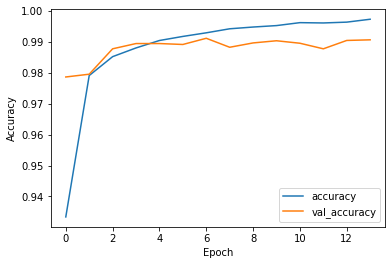

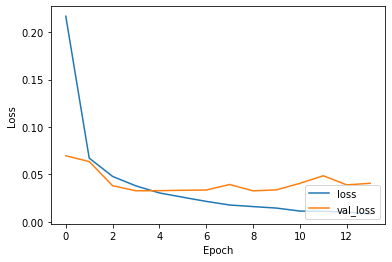

Training Results:
- Training Accuracy:	99.73%
- Training Loss:	0.0084

Validation Results:
- Validation Accuracy:	99.06%
- Validation Loss:	0.041

Best Validation Results:
- Validation Accuracy:	99.11%
- Validation Loss:	0.033


In [24]:
# Evaluating our model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

print("Training Results:")
print("- Training Accuracy:\t{:.2%}".format(history.history['accuracy'][-1]))
print("- Training Loss:\t{:.2}".format(history.history['loss'][-1]))
print("")
print("Validation Results:")
print("- Validation Accuracy:\t{:.2%}".format(history.history['val_accuracy'][-1]))
print("- Validation Loss:\t{:.2}".format(history.history['val_loss'][-1]))
print("")
print("Best Validation Results:")
print("- Validation Accuracy:\t{:.2%}".format(max(history.history['val_accuracy'])))
print("- Validation Loss:\t{:.2}".format(min(history.history['val_loss'])))

# Restoring our Model

Here, we'll restore our model by loading the model's saved directory to see if has been properly saved.

In [38]:
from tensorflow.keras.models import load_model

In [39]:
# Setting checkpoint file path to saved model weights if loading fresh notebook
curr_dir = os.getcwd()
checkpoint_dir = os.path.join(curr_dir, 'checkpoint')
ckpt_file_path = os.path.join(checkpoint_dir, 'ckpt')

In [40]:
# Loading saved model
saved_model = load_model(ckpt_file_path)

In [41]:
# Evaluate the model after loading to check if properly saved
loss, acc = saved_model.evaluate(X_test, y_test, verbose=0)

In [42]:
# Accuracy and Loss should be similar to the best validation results of simple_cnn
print("Restored Model, Accuracy:\t{:.2%}".format(acc))
print("Restored Model, Loss:\t\t{:.2}".format(loss))

Restored Model, Accuracy:	98.96%
Restored Model, Loss:		0.033
